#**Project Overview**
---
In this project, I try to create a polynomial regression model from scratch. Here, I try to predict the selling price of a car based on certain features (which would be explained later in the notebook) in the dataset that is used.

The source for this dataset can be found via this link:
https://www.kaggle.com/code/farzadnekouei/polynomial-regression-regularization-assumptions/input?select=car+data.csv

note: to make it easier to access in this notebook, the dataset was placed in github

##**1. Importing Libraries**
---

In [80]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Eluation metrics library
from sklearn.metrics import r2_score, mean_squared_error

##**2. Data Loading**
---
This dataset contains information about used cars listed on different websites
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset is as follows:

1. **Car_Name** - the name of the car
2. **Year** - year in which the car was bought
3. **Selling_Price** - price the owner wants to sell the car at
4. **Present_Price** - current ex-showroom price of the car
5. **Kms_Driven** - distance completed by the car in km
6. **Fuel_Type** - fuel type of the car
7. **Seller_Type** - defines whether the seller is a dealer or an individual
8. **Transmission** - defines whether the car is manual or automatic
9. **Owner** - defines the number of owners the car has previously had

In [81]:
car_data_raw = 'https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/car_data.csv'
car_df = pd.read_csv(car_data_raw)

car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##**3. Exploratory Data Analysis (EDA)**
---
Exploratory data analysis or EDA is done in order to understand the dataset used to create the model. In this project, the EDA process involves these steps:
1. Data description
2. Descriptive statistics
3. Missing data detection
4. Duplicated data detection
5. Data distribution analysis
6. Data outlier detection
7. Correlation analysis

###**a. Data Description**

In [82]:
car_df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [83]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Here, it could be seen that the data is relatively clean, with all features having the correct data type and there being no null values

###**b. Descriptive Statistics**

In [84]:
car_df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


###**c. Missing Data Detection**

In [85]:
car_df.isnull().sum()

# As has been explained earlier, this data has no missing vakues. Thus, this reinforces said
# explanation, by showing the number of missing values (which is none) on each feature

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


###**d. Duplicated Data Detection**

In [86]:
car_df.duplicated().sum()

np.int64(2)

In [87]:
car_df[car_df.duplicated() == True]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


###**e. Data Distribution**

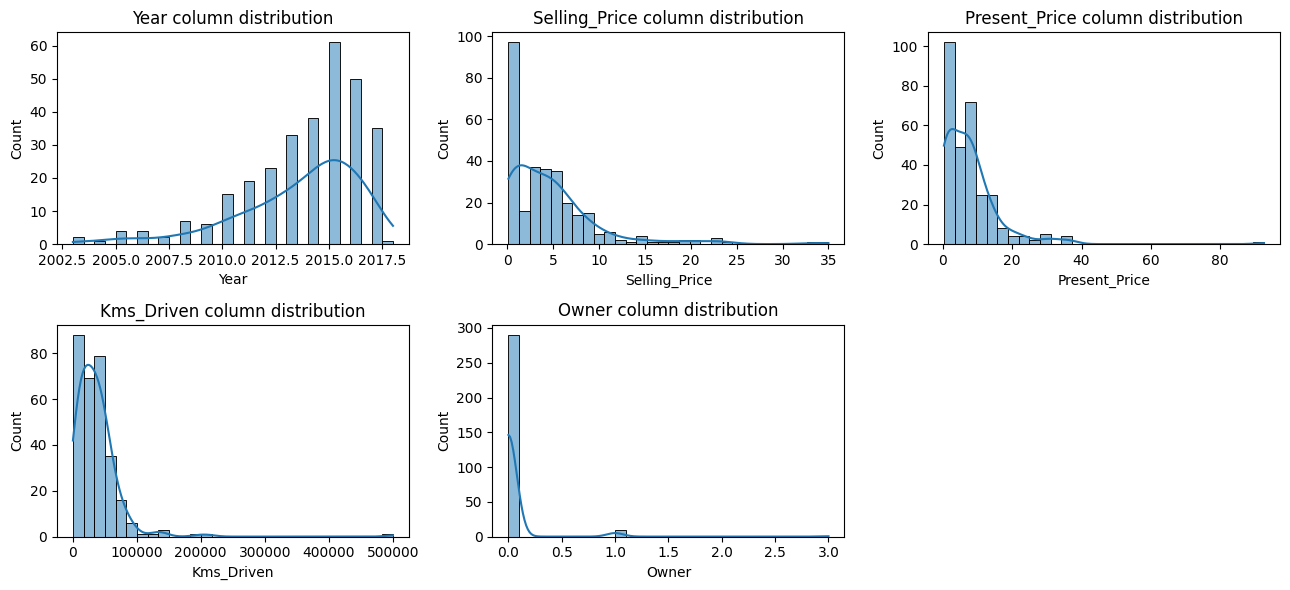

In [88]:
# Checking numeric data distributions

car_df_numeric = car_df.select_dtypes(include = 'number')

plt.figure(figsize = (13, 6))
for i, col in enumerate(car_df_numeric.columns):
  plt.subplot(2, 3, i + 1)
  sns.histplot(car_df_numeric[col], kde = True, bins = 30)
  plt.title(f'{col} column distribution')
plt.tight_layout()
plt.show()

# Here, all of the numerical features has skewed distributions, and as such, would have to be normalized
# or scaled in order to apply it to the regression model

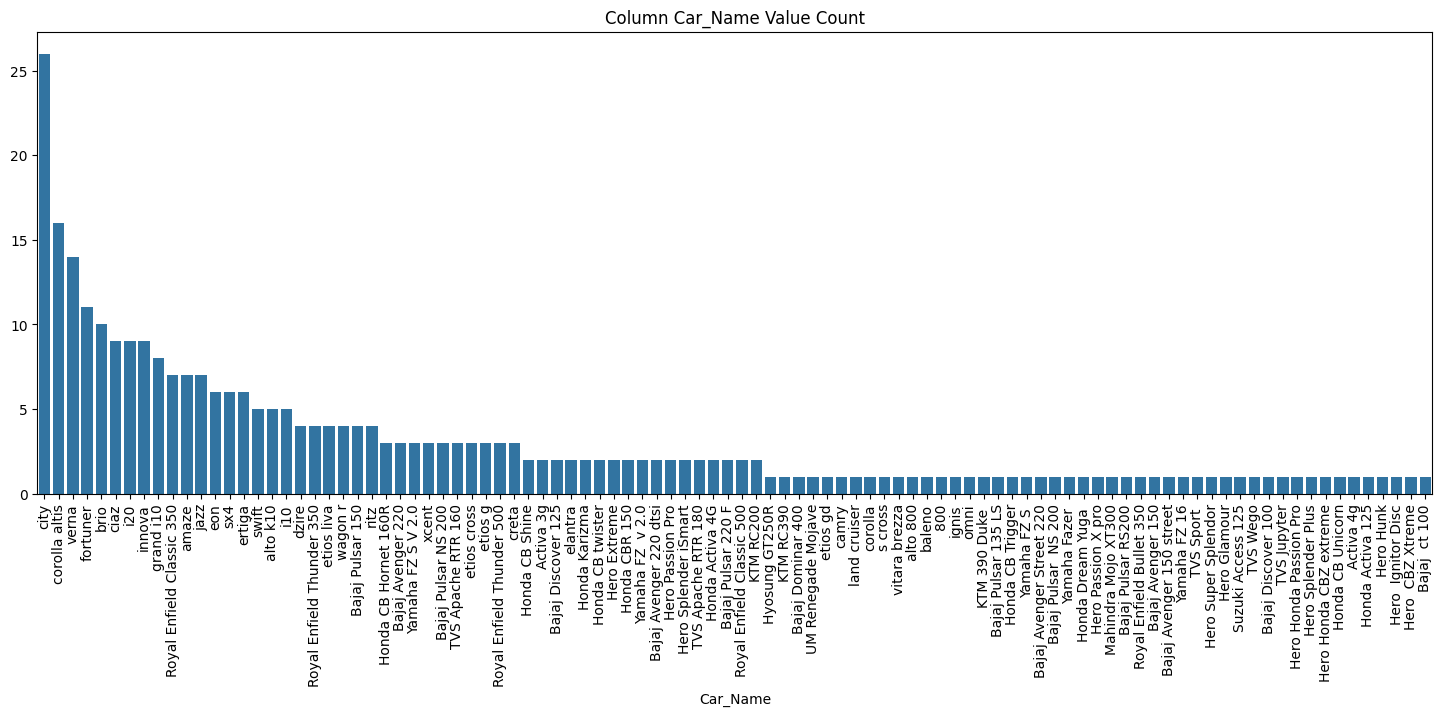

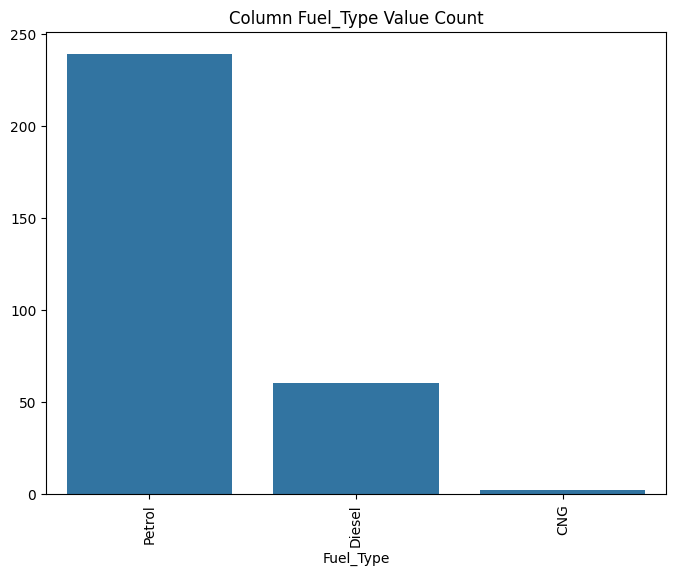

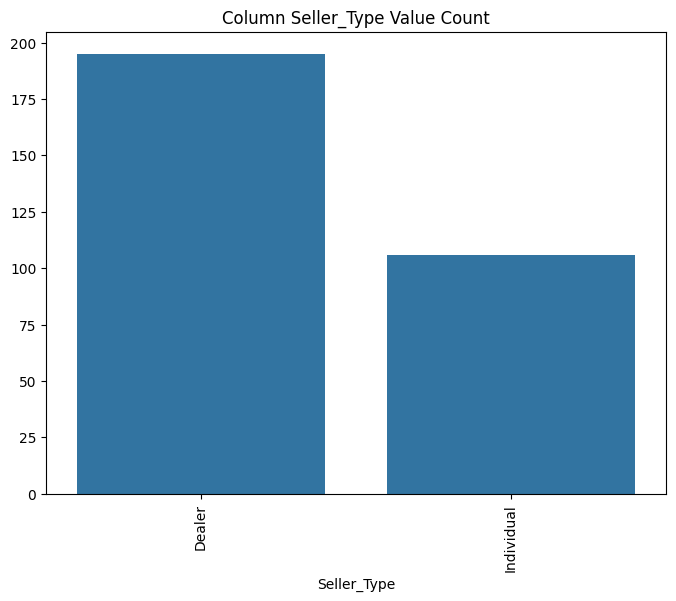

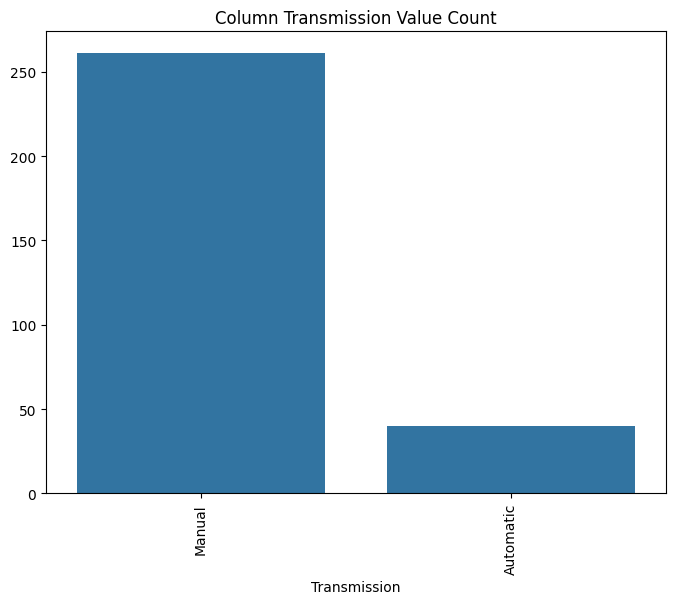

In [89]:
# Checking distribution of categorical data

car_df_categorical = car_df.select_dtypes(include = ['object'])

for col in car_df_categorical.columns:
  value_counts_ = car_df_categorical[col].value_counts()
  if col == 'Car_Name':
    plt.figure(figsize = (18, 6))
  else:
    plt.figure(figsize = (8, 6))
  sns.barplot(x=value_counts_.index, y=value_counts_.values)
  plt.title(f'Column {col} Value Count')
  plt.xticks(rotation=90)
  plt.show()

# Similar to the numerical data, the categorical data on this dataset is skewed, and as such, after
# encoding these categorical data, it would be necessary to scale/normalize it

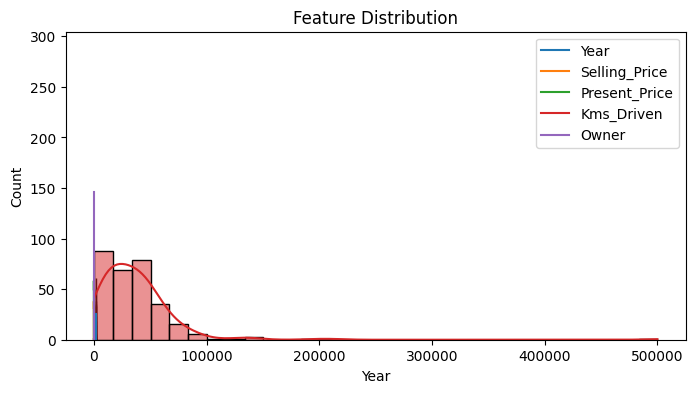

In [90]:
# Getting numeric feature distribution (grouped)

car_df_numeric = car_df.select_dtypes(include = 'number')

plt.figure(figsize = (8, 4))
for col in car_df_numeric.columns:
  sns.histplot(car_df_numeric[col], kde=True, bins=30)
plt.title('Feature Distribution')
plt.legend([col for col in car_df_numeric.columns], loc='upper right')
plt.show()

# From this plot, it could be said that in general, the distribution of numerical data in this
# dataset is relatively right-skewed

###**f. Outlier Detection**

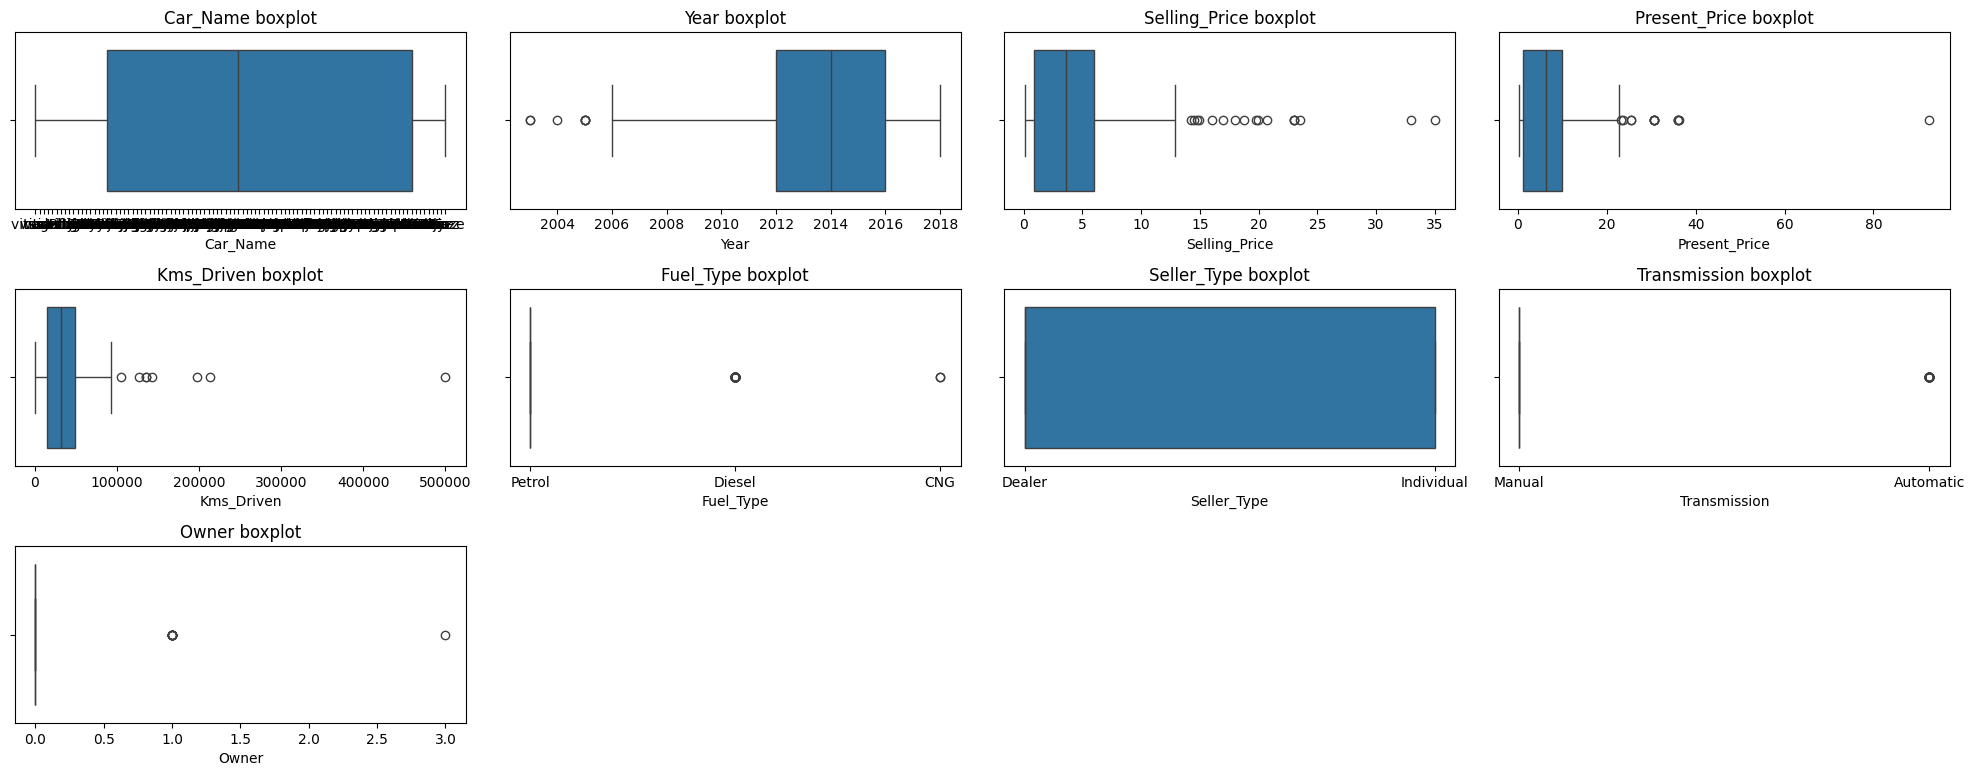

In [91]:
plt.figure(figsize = (20, 10))
for i, col in enumerate(car_df.columns):
  plt.subplot(4, 4, i + 1)
  sns.boxplot(x=car_df[col])
  plt.title(f'{col} boxplot')
plt.tight_layout()
plt.show()

# Based on the boxplot below, there is a significant number of outliers, and as such, these would have to be
# handled later in the notebook. However, it should be noted that it is clear that there are certain extreme
# values, especially on columns Selling_Price, Present_Price, and Kms_Driven

###**g. Correlation Analysis**

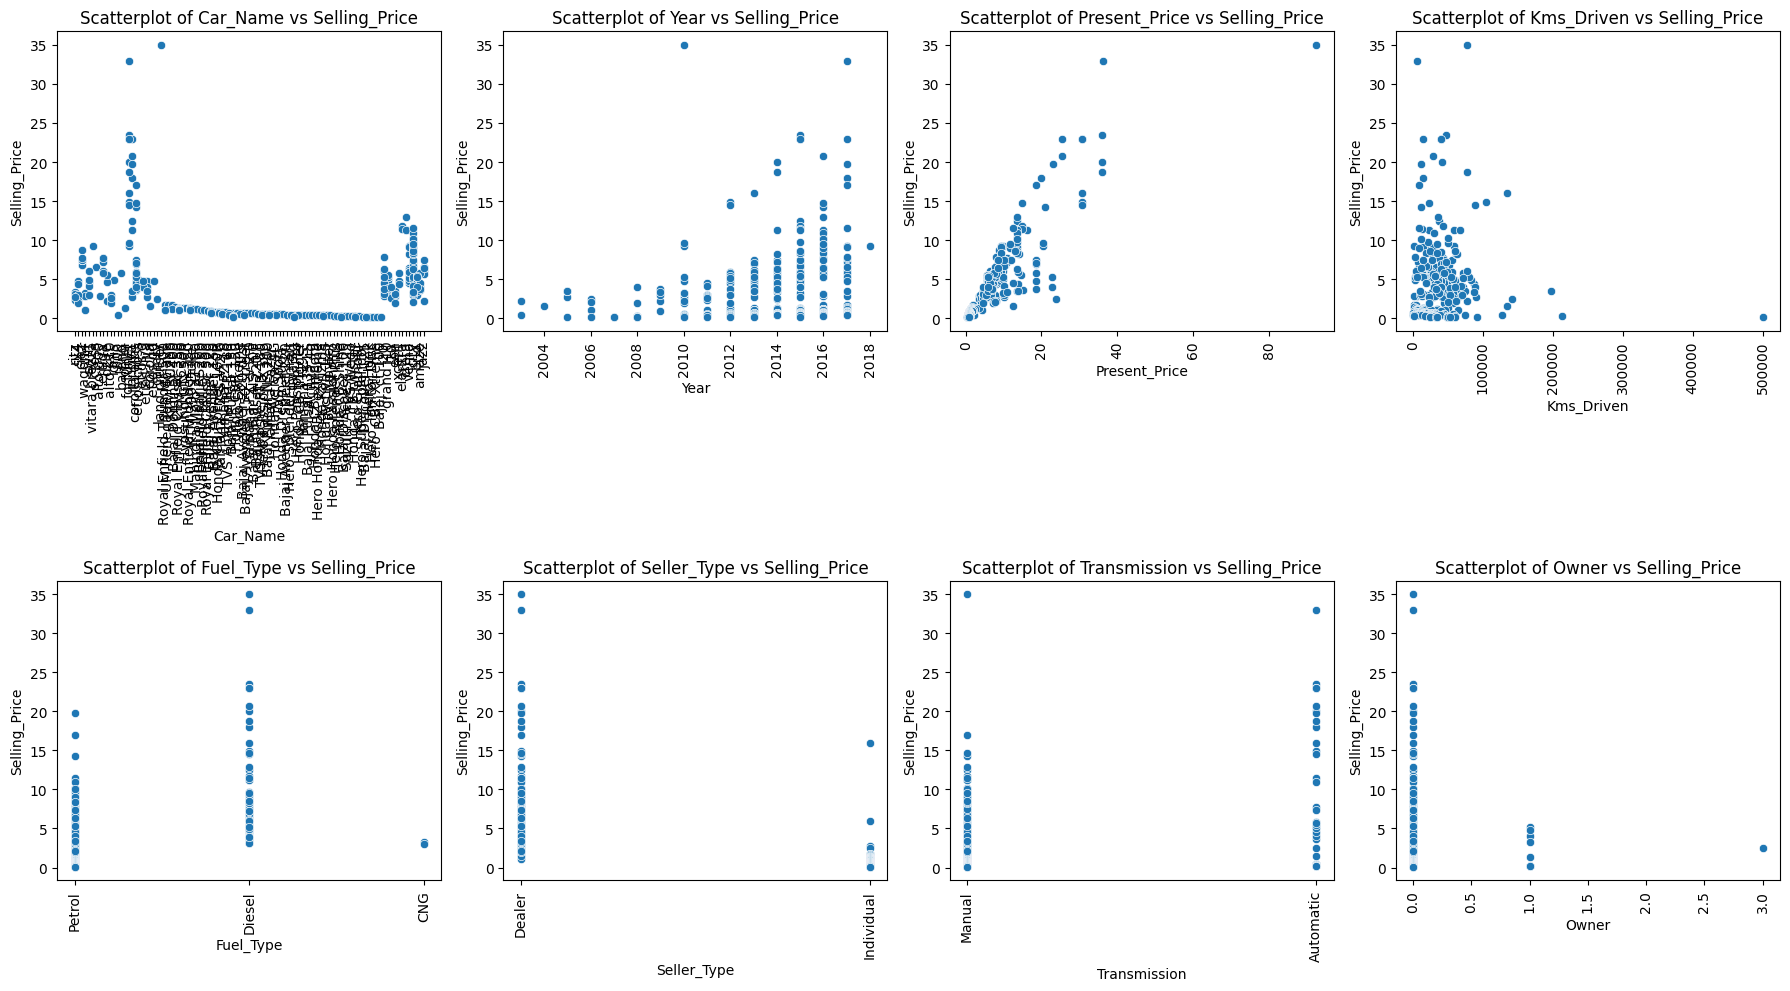

In [92]:
# Bivariate analysis between dependent and independent variables

car_df_without_target = car_df[[col for col in car_df.columns if col != 'Selling_Price']]

plt.figure(figsize = (18, 20))
for i, col in enumerate(car_df_without_target.columns):
  plt.subplot(4, 4, i + 1)
  sns.scatterplot(y=car_df['Selling_Price'], x=car_df[col])
  plt.title(f'Scatterplot of {col} vs Selling_Price')
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# Here, there are certain data points which lie very far from other data points. These data points could be
# identified as actual outliers that could be removed or imputed later

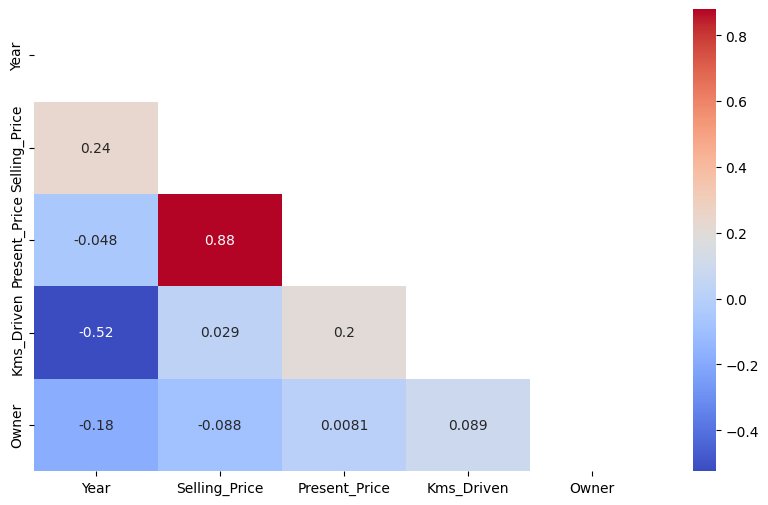

In [93]:
# Getting correlations between numeric data
car_df_numeric = car_df.select_dtypes(include = 'number')

plt.figure(figsize = (10, 6))
corr = car_df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

# Based on this, a strong candidate feature for predicting the selling price is the present price of a car,
# as it has a positive 88% correlation

##**4. Data Pre-Processing**
---
Data pre-processing is done in order to deal with any issues inside the dataset (i.e. dealing with missing values). Based on the EDA that was done, these are the steps taken in this phase:
1. Duplicated data handling
2. Outlier handling
3. Data encoding
4. Data splitting & scaling

###**a. Duplicated Data Handling**

In [94]:
car_df = car_df.drop_duplicates()
car_df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


###**b. Handling Outliers**

In [95]:
car_df_numeric = car_df.select_dtypes(include = 'number')
car_df_categorical = car_df.select_dtypes(include = 'object')
outlier_idx = []

for col in car_df_categorical.columns:
  for item in car_df[col].unique():
    car_df_item = car_df[car_df[col] == item]
    q1 = car_df_item['Selling_Price'].quantile(0.25)
    q3 = car_df_item['Selling_Price'].quantile(0.75)
    iqr = q3 - q1
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    row_indexes = car_df_item[(car_df_item['Selling_Price'] < min) | (car_df_item['Selling_Price'] > max)].index
    outlier_idx.extend(row_indexes.tolist())

for col in car_df_numeric.columns:
  q1 = car_df[col].quantile(0.25)
  q3 = car_df[col].quantile(0.75)
  iqr = q3 - q1
  max = q3 + (1.5 * iqr)
  min = q1 - (1.5 * iqr)
  row_indexes = car_df[(car_df[col] < min) | (car_df[col] > max)].index
  outlier_idx.extend(row_indexes.tolist())

print(outlier_idx)
print(f'Number of outlier rows: {len(outlier_idx)}')
print(f'Percentage of outliers: {(len(outlier_idx) / len(car_df)) * 100}\n')

# Deleting only extreme outliers:
to_be_removed = []
to_be_removed.extend(car_df[car_df['Selling_Price'] > 30].index.tolist())
to_be_removed.extend(car_df[car_df['Kms_Driven'] > 400000].index.tolist())
print(to_be_removed)
print(f'Number of outlier rows removed: {len(to_be_removed)}\n')

car_df.loc[to_be_removed, :]

[6, 8, 11, 47, 28, 69, 80, 97, 104, 135, 233, 248, 239, 231, 235, 287, 273, 66, 69, 97, 63, 64, 86, 50, 51, 52, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 96, 97, 27, 53, 54, 85, 69, 80, 86, 97, 250, 37, 39, 54, 77, 84, 92, 189, 50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 96, 97, 50, 51, 53, 59, 62, 63, 64, 66, 78, 79, 82, 85, 86, 96, 37, 50, 53, 77, 84, 85, 179, 196, 58, 85, 106, 184, 191, 192, 193, 198, 201, 205, 241]
Number of outlier rows: 103
Percentage of outliers: 34.448160535117054

[64, 86, 196]
Number of outlier rows removed: 3



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [96]:
car_df.drop(to_be_removed, inplace=True)
car_df.shape

(296, 9)

###**c. Data encoding**

In [97]:
columns_to_encode = ['Fuel_Type', 'Seller_Type', 'Transmission']

car_df = pd.get_dummies(car_df, columns=columns_to_encode, drop_first=True, dtype=float)
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0.0,1.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,1.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,1.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0,1.0,0.0,0.0,1.0


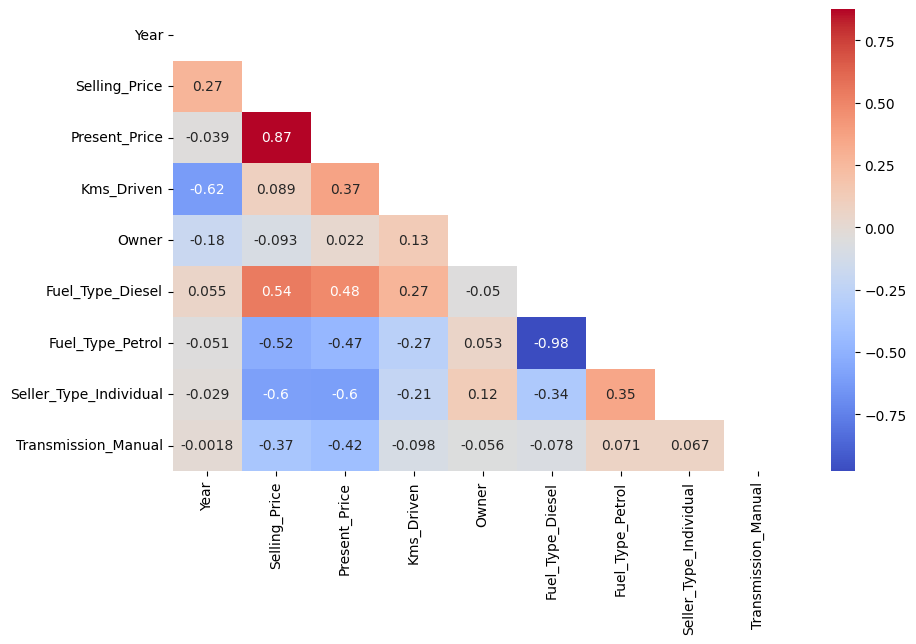

In [98]:
# Getting correlations between numeric data
car_df_numeric = car_df.select_dtypes(include = 'number')

plt.figure(figsize = (10, 6))
corr = car_df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

# Based on the correlation heatmap below, it could be ascertained that some of the likely candidates
# for variables are Present_Price, Fuel_Type_Diesel. Fuel_Type_Petrol, and Seller_Type_Individual, each having
# > 50% negative or positive correlation with Selling_Price

###**d. Data Splitting & Scaling**

####Selecting Columns

In [99]:
# Selecting the right columns

# x = car_df[[col for col in car_df.columns if col != 'Selling_Price' and col != 'Car_Name']]
x = car_df[['Present_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual']]
y = car_df['Selling_Price']

####Creating Polynomial Features

In [100]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = polynomial_features.fit_transform(x)
x_poly = pd.DataFrame(x_poly, columns=polynomial_features.get_feature_names_out(x.columns))
y = y

x_poly.head()

,Present_Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Present_Price^2,Present_Price Fuel_Type_Diesel,Present_Price Fuel_Type_Petrol,Present_Price Seller_Type_Individual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Fuel_Type_Petrol,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Petrol^2,Fuel_Type_Petrol Seller_Type_Individual,Seller_Type_Individual^2
0,5.59,0.0,1.0,0.0,31.2481,0.00,5.59,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9.54,1.0,0.0,0.0,91.0116,9.54,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.85,0.0,1.0,0.0,97.0225,0.00,9.85,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.15,0.0,1.0,0.0,17.2225,0.00,4.15,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6.87,1.0,0.0,0.0,47.1969,6.87,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0


####Data splitting

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=0)

####Scaling on input variables (x)

In [102]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

##**5. Data Modelling**
---

###**a. Regression Model From Scratch**

In [103]:
class Regression():
  def __init__(self, x, y, lr=0.01):
    self.x = x
    self.y = y
    self.lr = lr
    self.a = 0
    self.b_vals = np.zeros((self.x.shape[1], 1))
    self.n = self.x.shape[0]

  def predict(self, x_vals):
    return np.dot(x_vals, self.b_vals) + self.a

  def calculate_derivative_b(self):
    error = self.predict(self.x) - self.y
    return (2 * np.dot(self.x.T, error)) / self.n

  def calculate_derivative_a(self):
    error = self.predict(self.x) - self.y
    return (2 * np.sum(error)) / self.n

  def calc_cost(self, x, y):
    return np.sum((self.predict(x) - y)**2) / self.n

  def grad_descent(self, iter=1000):
    for _ in range(iter):
      adjustment_b = self.calculate_derivative_b() * self.lr
      adjustment_a = self.calculate_derivative_a() * self.lr
      self.b_vals -= adjustment_b
      self.a -= adjustment_a

    return self.b_vals, self.a

In [104]:
reg_model = Regression(x_train_scaled, y_train)
coef, intercept = reg_model.grad_descent(iter=1000)

print(f'Coefficient (b): {coef}')
print(f'Intercept (a): {intercept}')

Coefficient (b): [[ 1.72924392]
 [ 0.09814775]
 [ 0.06465279]
 [-0.18053998]
 [ 0.61966454]
 [ 1.41812441]
 [ 0.57438215]
 [-0.56385357]
 [ 0.09814775]
 [ 0.        ]
 [ 0.        ]
 [ 0.06465279]
 [-0.18053998]
 [-0.18053998]]
Intercept (a): 4.197101442211777


In [105]:
y_pred = reg_model.predict(x_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2: {r2}')
print(f'MSE: {mse}')

R2: 0.6775902326516176
MSE: 5.479556999049234


###**b. Regression Model with SK-Learn**

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [[ 0.01105524 -1.06694773 -0.60433005 -0.02868219 -1.8472208   6.58692791
   3.13348117 -0.56723177 -1.06694773  0.          0.         -0.60433005
  -0.02868219 -0.02868219]]
Intercept: [4.19710145]


In [108]:
y_pred = model.predict(x_test_scaled)

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R2: 0.7244631908349204
MSE: 4.682921561507029


##**6. Conclusion**
---
The resulting R2 scores of both regression models are fairly similar and fairly decent, where both models has >60% R2 score, having only around a 5% difference, in favor of SKLearn's model.

Something similar could be said regarding MSE (Mean Squared Error) of both models. There is only a difference of around 1 between the from-scratch model and SKLearn's model, which is fairly minor

As such, still, the SKLearn model is still more viable for regular use, though the drom-scratch model can still be improved for better results, like by implementing regularization